In [1]:
import pandas as pd
# import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Stage 1: Data validation and Cleaning

In [2]:
listing_df = pd.read_csv("data/Listings.csv", sep=",", encoding="latin1", low_memory=False)

In [3]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [4]:
listing_df.shape

(279712, 33)

In [5]:
listing_df.sample(n=5)

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
146909,10821911,Best place in Condesa,20991334,2014-09-05,"Mexico City, Federal District, Mexico",NaN,NaN,0.00,f,5.0,...,1,1125,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f
81802,39014210,The Anonymous Bombay House,194021695,2018-06-07,"Bangkok, Thailand",within an hour,1.0,1.00,t,15.0,...,2,1125,94.0,10.0,9.0,10.0,10.0,10.0,10.0,t
200424,21431224,Zetland Ã©Â«ËÃ¦Â¡Â£Ã§Å½Â°Ã¤Â»Â£Ã¥ÅâÃ¥â¦Â¬...,154950131,2017-10-17,AU,NaN,NaN,NaN,f,1.0,...,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
134119,8766964,Deluxe Twin Room With Mountain View,28025034,2015-02-19,"Vaucluse, New South Wales, Australia",within a few hours,1.0,0.67,f,5.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
227472,39387361,Cozzy flat in BeÃ Å¸iktaÃ Å¸,53132948,2016-01-03,"BeÃ Å¸iktaÃ Å¸ KÃÂ¶yÃÂ¼, Ardahan, Turkey",NaN,NaN,0.00,f,0.0,...,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


In [6]:
listing_df.isna().sum()

listing_id                          0
name                              175
host_id                             0
host_since                        165
host_location                     840
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                 165
host_total_listings_count         165
host_has_profile_pic              165
host_identity_verified            165
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [7]:
listing_df[["neighbourhood", "minimum_nights", "property_type", "accommodates", "bedrooms", "price"]].sample(10)

,neighbourhood,minimum_nights,property_type,accommodates,bedrooms,price
13916,Ward 115,3,Entire apartment,2,1.0,824
247674,Khlong Toei,1,Entire apartment,4,1.0,1800
77802,I Centro Storico,2,Entire apartment,3,NaN,45
128203,Yau Tsim Mong,1,Private room in apartment,3,1.0,452
250957,Barra da Tijuca,7,Entire apartment,7,3.0,2727
267580,Ward 64,1,Entire apartment,4,2.0,838
4692,Buttes-Chaumont,3,Entire apartment,3,1.0,37
181085,Chatu Chak,90,Entire house,4,1.0,2000
146590,Sydney,1,Private room in serviced apartment,2,1.0,183
193058,Buttes-Chaumont,7,Private room in apartment,2,1.0,38


In [8]:
listing_df.nunique()

listing_id                     279712
name                           265860
host_id                        182024
host_since                       4240
host_location                    7159
host_response_time                  4
host_response_rate                 91
host_acceptance_rate              101
host_is_superhost                   2
host_total_listings_count         206
host_has_profile_pic                2
host_identity_verified              2
neighbourhood                     660
district                            5
city                               10
latitude                       103503
longitude                      118021
property_type                     144
room_type                           4
accommodates                       17
bedrooms                           39
amenities                      245003
price                            5194
minimum_nights                    202
maximum_nights                    508
review_scores_rating               63
review_score

In [9]:
listing_df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
listing_df['host_since'] = listing_df['host_since'].apply(pd.to_datetime, errors='coerce')

In [11]:
df = listing_df.copy()

In [12]:
# clip extreme max_nights (Airbnb often caps at 365 or 1000 in practice)
df["minimum_nights"] = df["minimum_nights"].clip(lower=1, upper=366)
df["maximum_nights"] = df["maximum_nights"].clip(lower=1, upper=366)

In [13]:
df = df.drop_duplicates(subset=['listing_id'])

In [14]:
print(df.isna().sum().sort_values(ascending=False).head(10))

district                       242700
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
review_scores_value             91785
review_scores_location          91775
review_scores_checkin           91771
review_scores_accuracy          91713
review_scores_communication     91687
review_scores_cleanliness       91665
dtype: int64


In [16]:
# Handling Outlier in price,

In [17]:
def remove_outliers_iqr(dataframe, column, threshold=1.5):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * threshold)
    upper_bound = q3 + (iqr * threshold)
    dataframe = dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]
    return dataframe

In [18]:
# Remove outliers from the 'total_sales' column
df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'minimum_nights')
df = remove_outliers_iqr(df, 'maximum_nights')

In [19]:
df.describe()

,listing_id,host_id,host_since,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.081310e+05,2.081310e+05,208005,112664.000000,125907.000000,208005.000000,208131.000000,208131.000000,208131.000000,185223.000000,208131.000000,208131.000000,208131.000000,146690.000000,146454.000000,146486.000000,146417.000000,146479.000000,146413.000000,146409.000000
mean,2.659077e+07,1.108354e+08,2016-05-05 07:38:38.984639488,0.865651,0.837057,20.236985,19.335959,18.683047,3.174534,1.434941,241.520014,2.460782,242.809457,93.294737,9.565748,9.312016,9.703395,9.702326,9.640756,9.334549
min,2.577000e+03,1.822000e+03,2008-08-12 00:00:00,0.000000,0.000000,0.000000,-34.246860,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.399090e+07,1.793698e+07,2014-07-17 00:00:00,0.900000,0.810000,1.000000,-22.968430,2.289190,2.000000,1.000000,70.000000,1.000000,30.000000,91.000000,9.000000,9.000000,10.000000,10.000000,10.000000,9.000000
50%,2.807312e+07,6.082708e+07,2016-03-02 00:00:00,1.000000,0.990000,1.000000,41.003630,2.392110,2.000000,1.000000,130.000000,2.000000,366.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.992167e+07,1.898693e+08,2018-05-16 00:00:00,1.000000,1.000000,4.000000,48.841960,28.983980,4.000000,2.000000,320.000000,3.000000,366.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.833988e+07,3.901874e+08,2021-02-26 00:00:00,1.000000,1.000000,7235.000000,48.904910,151.339770,16.000000,50.000000,1072.000000,11.000000,366.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
std,1.442195e+07,1.121124e+08,NaN,0.284813,0.285639,280.129880,33.602271,70.034351,1.933013,1.086382,247.001997,1.810279,160.214441,10.051478,0.986067,1.140141,0.861848,0.876841,0.828341,1.033734


In [21]:
df.isna().sum().sort_values(ascending=False)

district                       196645
host_response_time              95467
host_response_rate              95467
host_acceptance_rate            82224
review_scores_value             61722
review_scores_location          61718
review_scores_checkin           61714
review_scores_accuracy          61677
review_scores_communication     61652
review_scores_cleanliness       61645
review_scores_rating            61441
bedrooms                        22908
host_location                     572
name                              135
host_total_listings_count         126
host_is_superhost                 126
host_since                        126
host_identity_verified            126
host_has_profile_pic              126
listing_id                          0
longitude                           0
host_id                             0
latitude                            0
city                                0
neighbourhood                       0
maximum_nights                      0
minimum_nigh

## Stage 2: EDA

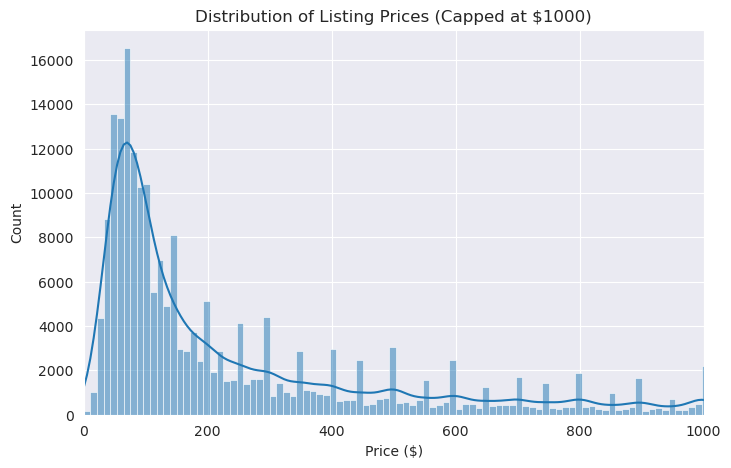

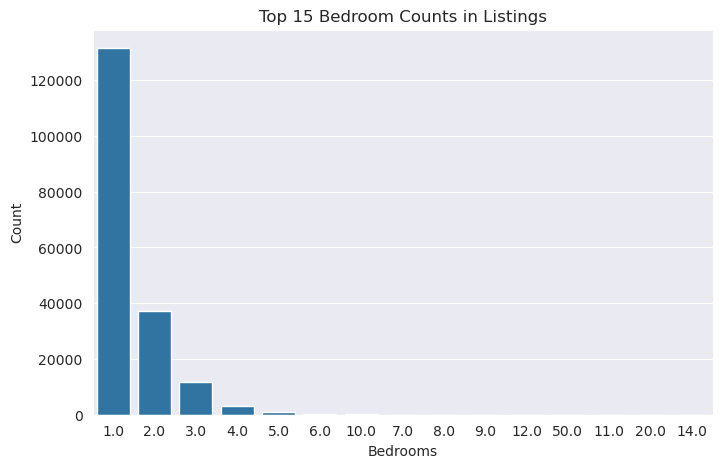

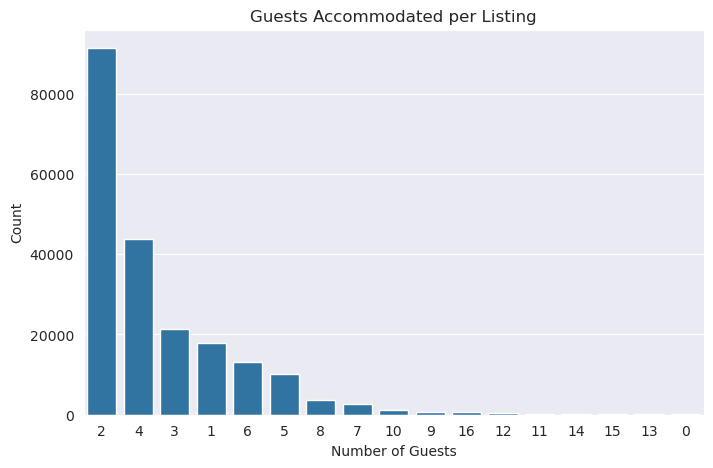

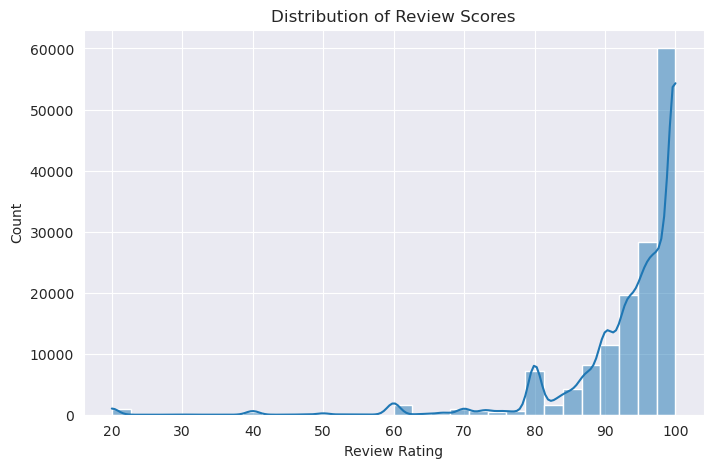

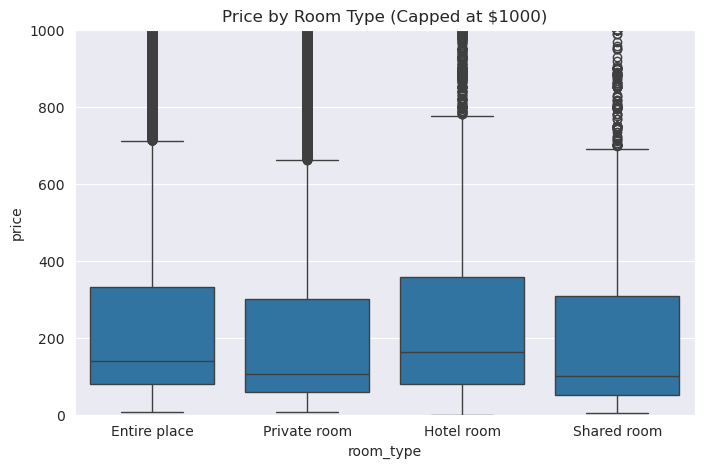

In [20]:
# ---- 1. Price Distribution ----
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=100, kde=True)
plt.xlim(0, 1000)   # focus on most listings (avoid outliers 600k+)
plt.title("Distribution of Listing Prices (Capped at $1000)")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

# ---- 2. Bedrooms Distribution ----
plt.figure(figsize=(8,5))
sns.countplot(x='bedrooms', data=df, order=df['bedrooms'].value_counts().index[:15])
plt.title("Top 15 Bedroom Counts in Listings")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

# ---- 3. Accommodates Distribution ----
plt.figure(figsize=(8,5))
sns.countplot(x='accommodates', data=df, order=df['accommodates'].value_counts().index)
plt.title("Guests Accommodated per Listing")
plt.xlabel("Number of Guests")
plt.ylabel("Count")
plt.show()

# ---- 4. Review Scores ----
plt.figure(figsize=(8,5))
sns.histplot(df['review_scores_rating'].dropna(), bins=30, kde=True)
plt.title("Distribution of Review Scores")
plt.xlabel("Review Rating")
plt.ylabel("Count")
plt.show()

# ---- 5. Price by Room Type ----
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.ylim(0, 1000)
plt.title("Price by Room Type (Capped at $1000)")
plt.show()

## EDA 2

In [140]:
# Can you spot any major differences in the Airbnb market between cities?

In [22]:
df['host_is_superhost'] = df['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0)

city_superhost_df = df[["city", "host_is_superhost"]].groupby(["city"]).agg({
    "host_is_superhost":"sum"
}).reset_index()

In [23]:
city_superhost_df.sort_values(by="host_is_superhost", ascending=False)

,city,host_is_superhost
6,Paris,7564.0
8,Rome,6971.0
4,Mexico City,4270.0
7,Rio de Janeiro,4129.0
9,Sydney,3837.0
5,New York,3665.0
3,Istanbul,2892.0
1,Cape Town,2306.0
0,Bangkok,1561.0
2,Hong Kong,509.0


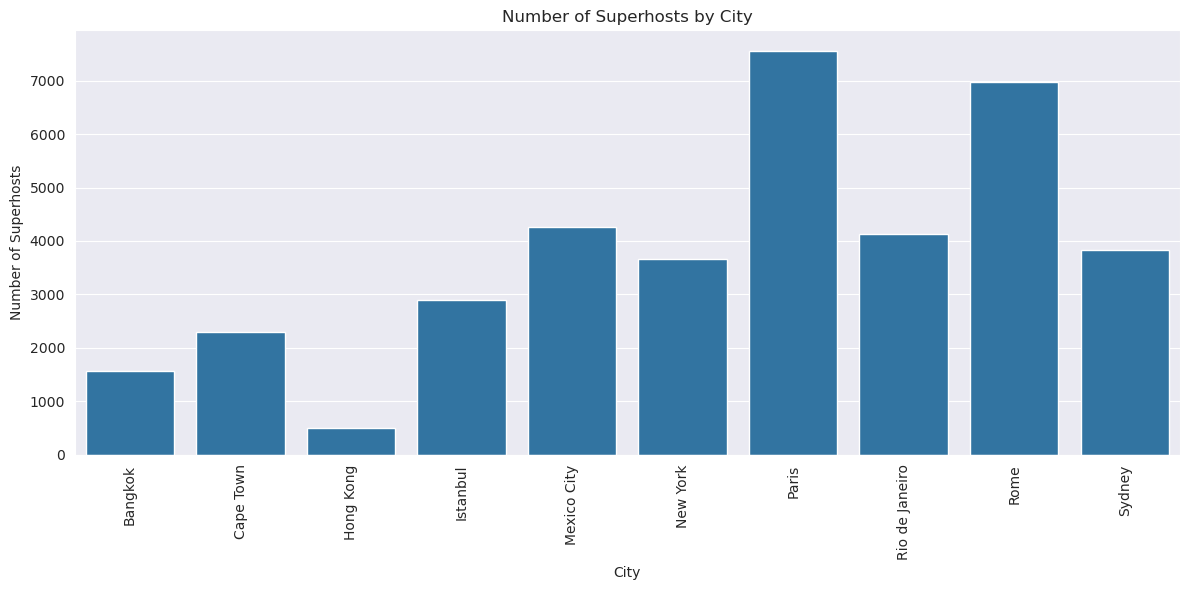

In [25]:
no_of_city = 10
plt.figure(figsize=(12,6))
sns.barplot(data=city_superhost_df.head(no_of_city), x="city", y="host_is_superhost")
plt.title("Number of Superhosts by City")
plt.xlabel("City")
plt.ylabel("Number of Superhosts")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Ensure labels fit within the plot area
plt.show()

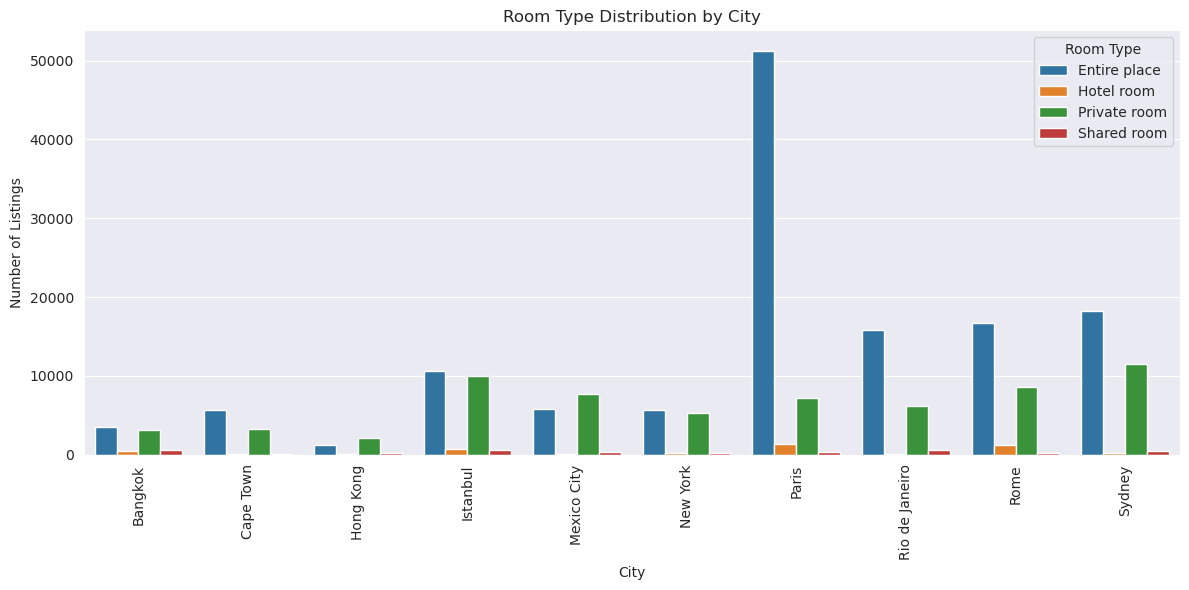

In [26]:
city_roomtype_df = df.groupby(["city", "room_type"]).size().reset_index(name="count")

plt.figure(figsize=(12,6))
sns.barplot(data=city_roomtype_df, x="city", y="count", hue="room_type")
plt.title("Room Type Distribution by City")
plt.xlabel("City")
plt.ylabel("Number of Listings")
plt.xticks(rotation=90)
plt.legend(title="Room Type")
plt.tight_layout()
plt.show()

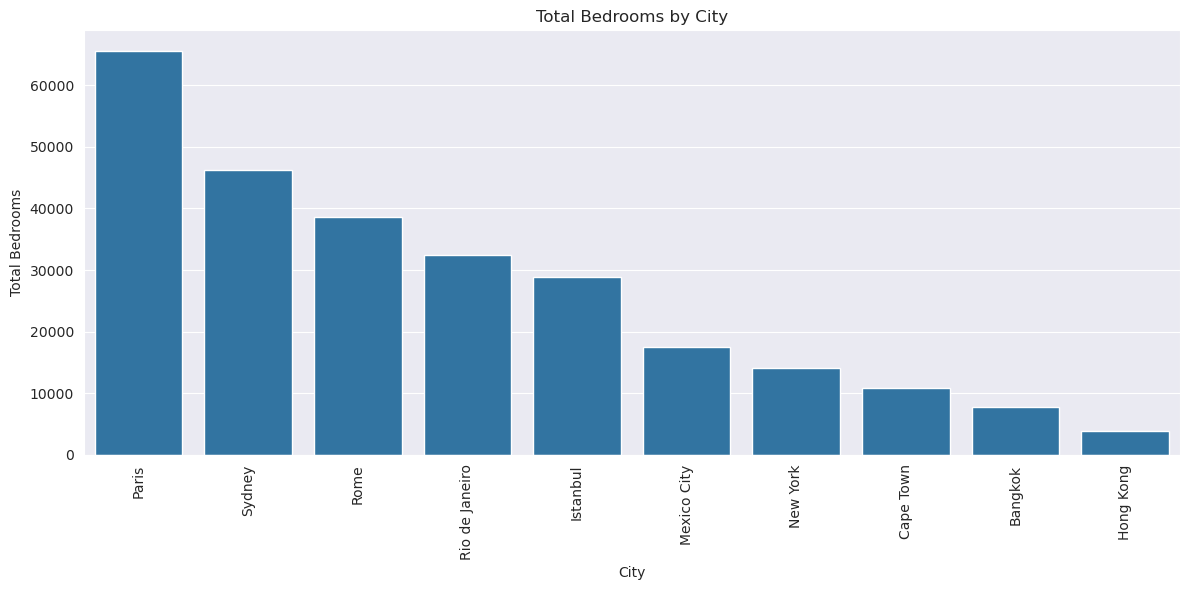

In [27]:
# Total bedrooms per city
city_bedrooms_df = df.groupby("city")["bedrooms"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=city_bedrooms_df.sort_values("bedrooms", ascending=False).head(10),
            x="city", y="bedrooms")
plt.title("Total Bedrooms by City")
plt.xlabel("City")
plt.ylabel("Total Bedrooms")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


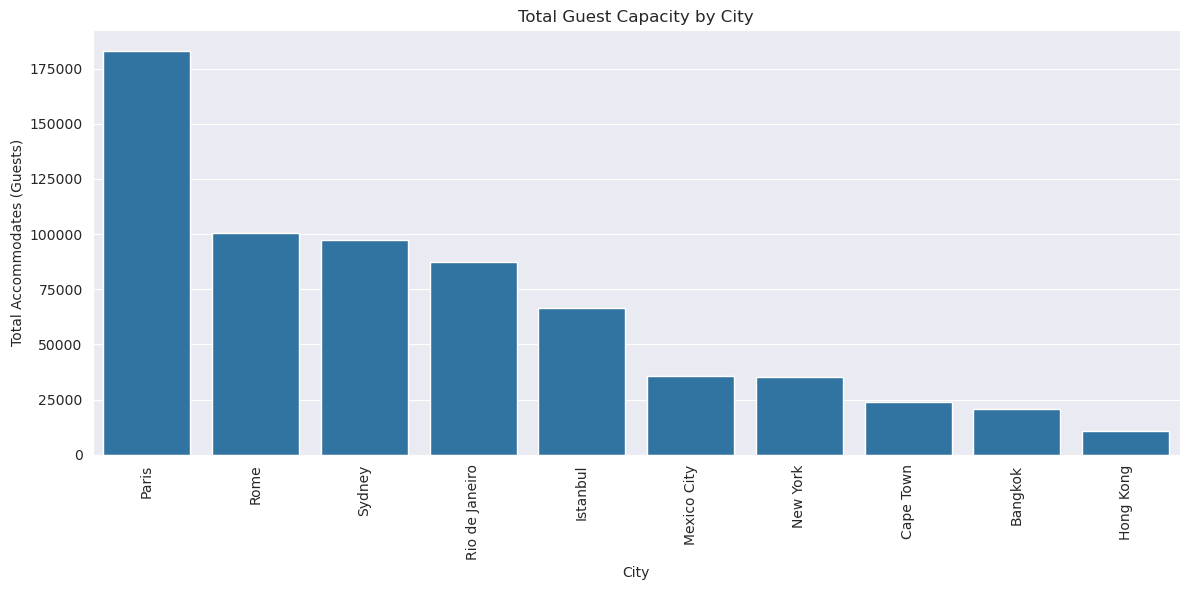

In [28]:
# Total accomodation per city
city_accommodates_df = df.groupby("city")["accommodates"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=city_accommodates_df.sort_values("accommodates", ascending=False).head(10),
            x="city", y="accommodates")
plt.title("Total Guest Capacity by City")
plt.xlabel("City")
plt.ylabel("Total Accommodates (Guests)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


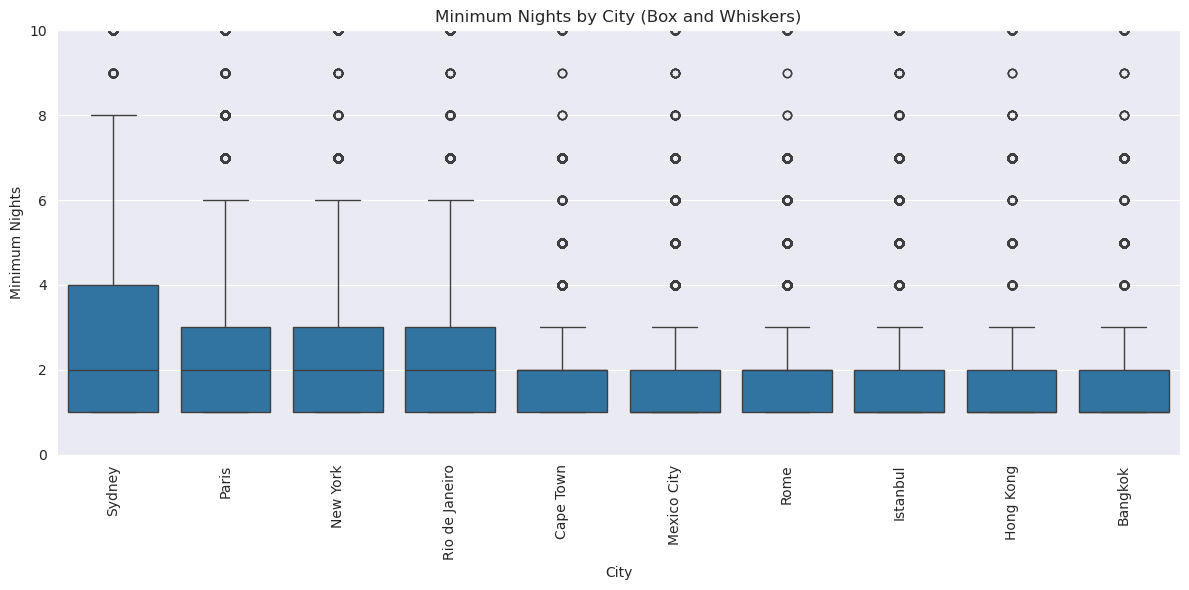

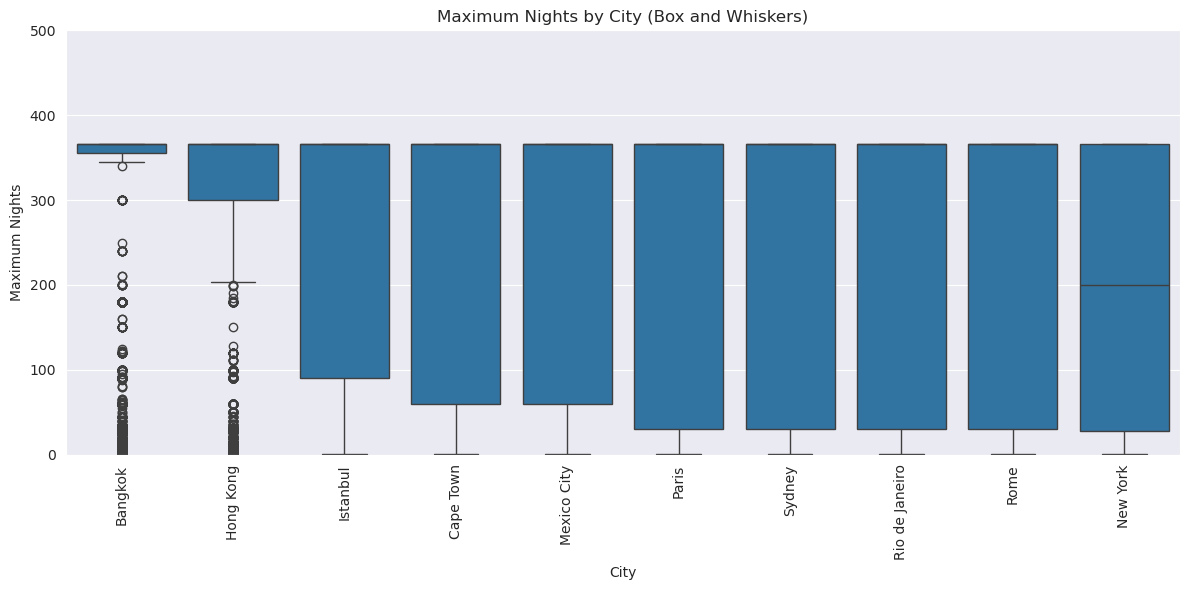

In [38]:
# Box-and-whisker plots of minimum and maximum nights by top 10 cities (by average)

# Top 10 cities by average minimum_nights
top_min_cities = (
    df.groupby("city")["minimum_nights"].mean().sort_values(ascending=False).head(10).index
)
min_data = df[df["city"].isin(top_min_cities)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=min_data, x="city", y="minimum_nights", order=top_min_cities)
plt.title("Minimum Nights by City (Box and Whiskers)")
plt.xlabel("City")
plt.ylabel("Minimum Nights")
plt.ylim(0, 10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top 10 cities by average maximum_nights
top_max_cities = (
    df.groupby("city")["maximum_nights"].mean().sort_values(ascending=False).head(10).index
)
max_data = df[df["city"].isin(top_max_cities)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=max_data, x="city", y="maximum_nights", order=top_max_cities)
plt.title("Maximum Nights by City (Box and Whiskers)")
plt.xlabel("City")
plt.ylabel("Maximum Nights")
plt.ylim(0, 500)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Feature Engineering and importance to price

In [39]:
# Which attributes have the biggest influence on price?

In [40]:
df = df.dropna(subset=['host_is_superhost', 'host_total_listings_count'])

In [41]:
drop_cols = ([
    "listing_id", "name", "host_id",  "host_location", "reviewer_id", "district", "date",#Highly unique columns
    "host_response_time", "host_response_rate", "host_acceptance_rate", #High level of NaN value (to bottom)
    "bedrooms", "review_scores_rating", "review_scores_accuracy", 
    "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication",
    "review_scores_location", "review_scores_value", "neighbourhood"
])
df = df.drop(columns=[c for c in drop_cols if c in df.columns])

X= df.drop(columns=["price"])
y= df["price"]

In [42]:
# Handling list of amenities
X["amenities"] = X["amenities"].astype(str)
X["amenities_count"] = X["amenities"].apply(lambda x: len(x.replace("[","").replace("]","").replace("\"","").replace("\'","").split(",")))
X = X.drop(columns=["amenities"])

# Handling Host_since "YYYY-MM-DD"
NO_OF_DAYS_IN_YEAR = 365
# YEAR_OF_AIRBNB_START = 2008
X["host_since"] = pd.to_datetime(X["host_since"], errors="coerce")
today = pd.to_datetime("today")
X["host_experience_years"] = (today - X["host_since"]).dt.days // NO_OF_DAYS_IN_YEAR
X = X.drop(columns=["host_since"])

In [43]:
X

,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,city,latitude,longitude,property_type,room_type,accommodates,minimum_nights,maximum_nights,instant_bookable,amenities_count,host_experience_years
0,0.0,1.0,t,f,Paris,48.88668,2.33343,Entire apartment,Entire place,2,2,366,f,5,13
1,0.0,1.0,t,t,Paris,48.88617,2.34515,Entire apartment,Entire place,2,2,366,f,8,11
2,0.0,1.0,t,f,Paris,48.88112,2.31712,Entire apartment,Entire place,2,2,366,f,6,11
3,0.0,1.0,t,t,Paris,48.84571,2.30584,Entire apartment,Entire place,2,2,366,f,5,11
4,0.0,1.0,t,f,Paris,48.85500,2.26979,Entire apartment,Entire place,2,2,366,f,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,0.0,1.0,t,t,Paris,48.82701,2.31419,Entire apartment,Entire place,2,1,7,f,12,10
279708,0.0,1.0,t,t,Paris,48.89309,2.33206,Entire apartment,Entire place,2,7,15,f,12,11
279709,0.0,1.0,t,t,Paris,48.88699,2.34920,Entire apartment,Entire place,2,6,30,f,15,13
279710,0.0,1.0,t,t,Paris,48.86687,2.38123,Entire apartment,Entire place,2,3,18,f,15,10


In [44]:
# X['host_is_superhost'] = X['host_is_superhost'].map({'t': 1, 'f': 0}).fillna(0)
X['host_has_profile_pic'] = X['host_has_profile_pic'].map({'t': 1, 'f': 0}).fillna(0)
X['host_identity_verified'] = X['host_identity_verified'].map({'t': 1, 'f': 0}).fillna(0)
X['instant_bookable'] = X['instant_bookable'].map({'t': 1, 'f': 0}).fillna(0)

## Building flexible pipeline with multiple model

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [46]:
# Feature groups
# "bedrooms" was removed from numerical, i will add it back if needed
numeric_features = ["accommodates", "minimum_nights", "maximum_nights",
                    "host_total_listings_count", "amenities_count", "host_experience_years"]
categorical_features = ["property_type", "room_type", "city", "instant_bookable",
                        "host_is_superhost", "host_has_profile_pic", "host_identity_verified"]

geo_features = ["latitude", "longitude"]  # for clustering


Text(0.5, 1.0, 'Elbow Method for Optimal k')

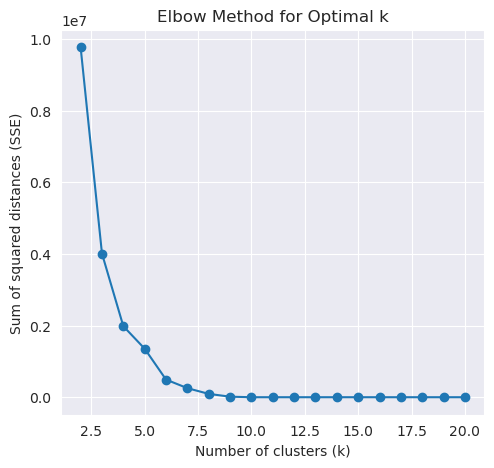

In [54]:
# Picking optimum number of clusters
from sklearn.metrics import silhouette_score

# geo = X[["latitude", "longitude"]]
geo = X[["latitude", "longitude"]].sample(5000)#to save time i choose a small sample
# Determine the optimal number of clusters using the Elbow Method
sse = []
silhouette = []
K_range = range(2, 21)

for k in K_range:
    k_means = KMeans(n_clusters=k, random_state=42)
    k_means.fit(geo)
    sse.append(k_means.inertia_)
    silhouette.append(silhouette_score(geo, k_means.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')#"'bx-'
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method for Optimal k')

In [57]:
# Preprocessors

# numeric → scaling
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# categorical → one hot
categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# geo → cluster + drop lat/lon
geo_transformer = Pipeline(steps=[
    ("cluster", KMeans(n_clusters=8, random_state=42)),  # Choose 8 based on the above graph
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [58]:
# Full preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
        ("geo", geo_transformer, geo_features)
    ],
    remainder="drop"
)

In [59]:
# Flexible Model Pipeline
def make_pipeline(regressor_model):
    return Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("regressor", regressor_model)
    ])

In [60]:
models = {
    "Linear Regression": LinearRegression(),
    # "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

In [61]:
# Example
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    pipeline = make_pipeline(model)
    scores_mae = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
    scores_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="r2")
    print(f"{name} - Mean MAE: {-scores_mae.mean():.2f}, Std: {scores_mae.std():.2f}")
    print(f"{name} - Mean R2: {scores_r2.mean():.2f}, Std: {scores_r2.std():.2f}")

Linear Regression - Mean MAE: 100.09, Std: 1.06
Linear Regression - Mean R2: 0.62, Std: 0.00


In [ ]:
# Permutation Importance for Linear Regression
from sklearn.inspection import permutation_importance

pipe = make_pipeline(models["Linear Regression"])
pipe.fit(X_train, y_train)

# Compute permutation importance on the test set
result = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=42)

# Get feature names after preprocessing
feature_names = (
    numeric_features +
    list(pipe
         .named_steps["preprocessor"].transformers_[1][1]
         .named_steps["encoder"].get_feature_names_out(categorical_features))
    + ["geo_cluster"]
)

importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": result.importances_mean,
    "Std": result.importances_std
}).sort_values(by="Importance", ascending=False)

print(importance.head(10))

## Time Series Analysis

In [139]:
# Are you able to identify any trends or seasonality in the review data?

In [140]:
reviews_df = pd.read_csv("data/Reviews.csv", sep=",", encoding="latin1", low_memory=False)
reviews_df["date"] = pd.to_datetime(reviews_df["date"], errors="coerce")
reviews_df.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [141]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype         
---  ------       -----         
 0   listing_id   int64         
 1   review_id    int64         
 2   date         datetime64[ns]
 3   reviewer_id  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 164.0 MB


In [142]:
reviews_df.isna().sum()

listing_id     0
review_id      0
date           0
reviewer_id    0
dtype: int64

In [143]:
# Monthly review volume and simple seasonality helpers
monthly_reviews = reviews_df.groupby(pd.Grouper(key="date", freq="MS")).size()

monthly_reviews


date
2008-11-01        2
2008-12-01        0
2009-01-01        1
2009-02-01        1
2009-03-01        0
              ...  
2020-11-01    54473
2020-12-01    57993
2021-01-01    61248
2021-02-01    21060
2021-03-01        1
Freq: MS, Length: 149, dtype: int64

In [144]:
# plotting the whole time series with an interactive plot
# !pip install plotly

import plotly.express as px

# Prepare data: monthly_reviews is a Series with a DatetimeIndex
ts = monthly_reviews
if isinstance(ts, pd.Series):
    ts = ts.reset_index(name="reviews")  # 'date' index becomes a column

fig = px.line(ts, x="date", y="reviews", title="Monthly Reviews Over Time (Interactive)")
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Reviews",
    hovermode="x unified",
)
fig.update_xaxes(rangeslider_visible=True)
fig.show()


In [145]:
ts

,date,reviews
0,2008-11-01,2
1,2008-12-01,0
2,2009-01-01,1
3,2009-02-01,1
4,2009-03-01,0
...,...,...
144,2020-11-01,54473
145,2020-12-01,57993
146,2021-01-01,61248
147,2021-02-01,21060


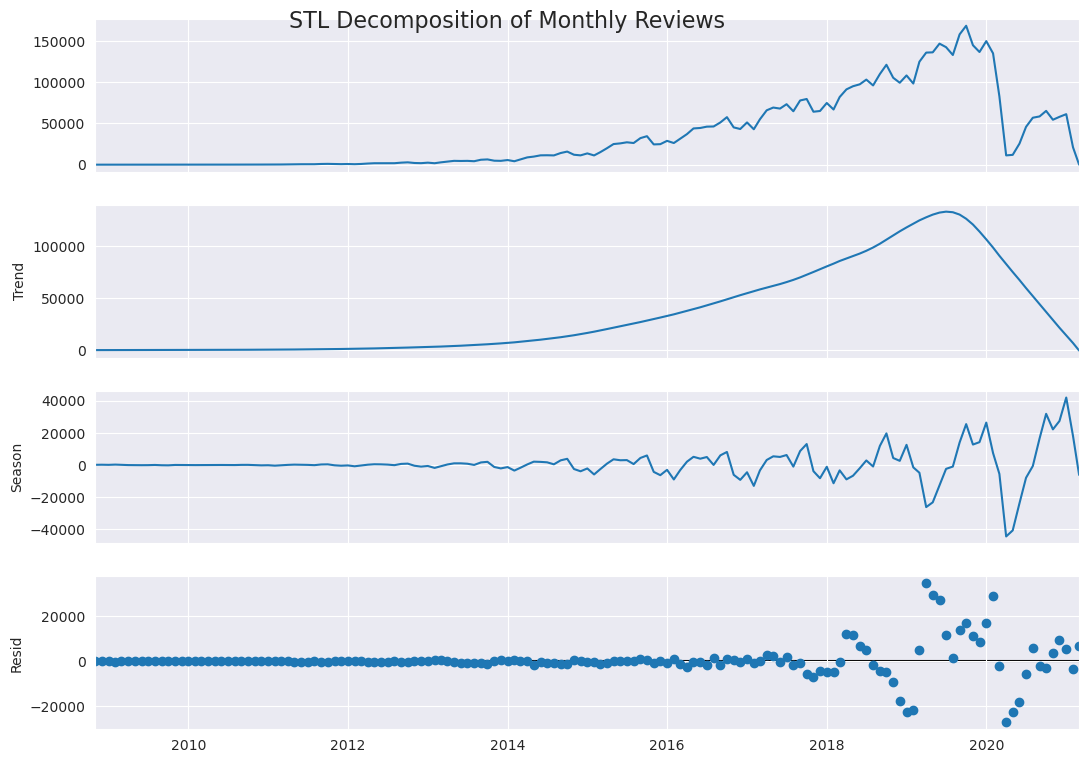

In [146]:
# Decompose the time series using statsmodels
from statsmodels.tsa.seasonal import STL

monthly_reviews = monthly_reviews.asfreq("MS").fillna(0)  # Ensure regular frequency and fill missing months
stl = STL(monthly_reviews, period=12)
result = stl.fit()

fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle("STL Decomposition of Monthly Reviews", fontsize=16)
plt.show()

# showing Original, Trend, Seasonal, Residuals

Forcast Modeling

In [147]:
# Setup
# !pip install pmdarima
# !pip install prophet
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

In [148]:
# Train/test split by time
split_date = "2018-12-31"
train_ts = ts[ts["date"] <= split_date]
test_ts = ts[ts["date"] > split_date]

print(f"Train size: {train_ts.shape}, Test size: {test_ts.shape}")

Train size: (122, 2), Test size: (27, 2)


In [149]:
#Arima
auto_arima = auto_arima(train_ts, seasonal=False, trace=False,
                        error_action="ignore", suppress_warnings=True)
arima_fit = auto_arima.fit(train_ts)
arima_forecast = arima_fit.predict(n_periods=len(test_ts))

/home/civm/anaconda3/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Int64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>)

In [150]:
# Holt-Winters Exponential Smoothing
ets_model = ExponentialSmoothing(train_ts, trend="add", seasonal="None", seasonal_periods=12, damped_trend=True)
ets_fit = ets_model.fit()
ets_forecast = ets_fit.forecast(steps=len(test_ts))

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [152]:
#Prophet
prophet_df = train_ts.reset_index()
prophet_df = prophet_df.rename(columns={"date": "ds", "reviews": "y"})

prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=len(test_ts), freq="MS")
forecast = prophet_model.predict(future)

prophet_forecast = forecast.set_index("ds")["yhat"][-len(test_ts):]

08:36:27 - cmdstanpy - INFO - Chain [1] start processing
08:36:27 - cmdstanpy - INFO - Chain [1] done processing


NameError: name 'arima_forecast' is not defined

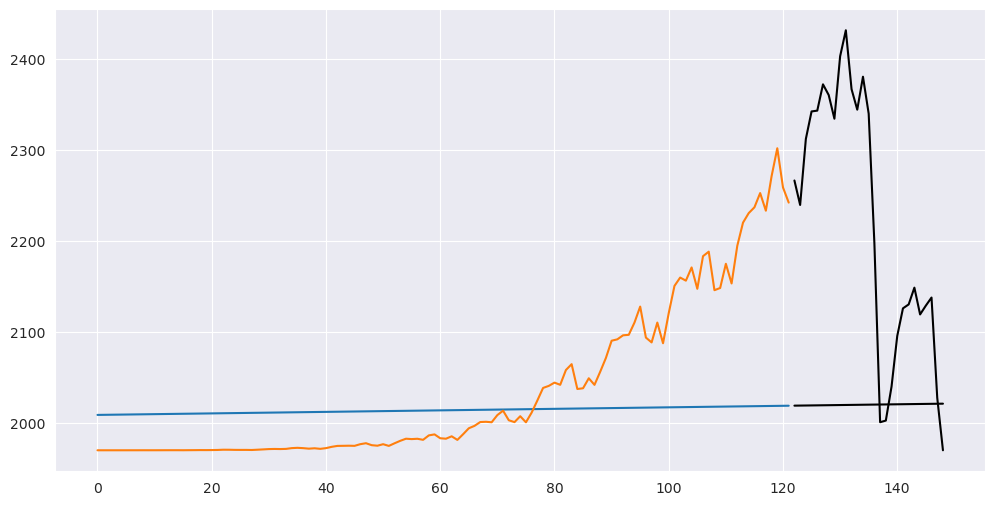

In [159]:
# Plot Results
plt.figure(figsize=(12,6))
plt.plot(train_ts.index, train_ts, label="Train")
plt.plot(test_ts.index, test_ts, label="Test", color="black")

plt.plot(arima_forecast.index, arima_forecast, label="ARIMA Forecast", linestyle="--")
plt.plot(ets_forecast.index, ets_forecast, label="ETS Forecast", linestyle="--")
plt.plot(prophet_forecast.index, prophet_forecast, label="Prophet Forecast", linestyle="--")

plt.title("Forecasting Airbnb Monthly Reviews (Comparing Models)")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.legend()
plt.show()

Model Evaluation

In [163]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [164]:
results = []

#Arima
rmse_arima = np.sqrt(mean_squared_error(test_ts, arima_forecast))
mape_arima = mean_absolute_percentage_error(test_ts, arima_forecast)
results.append(["ARIMA", rmse_arima, mape_arima])

#ETS
rmse_ets = np.sqrt(mean_squared_error(test_ts, ets_forecast))
mape_ets = mean_absolute_percentage_error(test_ts, ets_forecast)
results.append(["ETS", rmse_ets, mape_ets])

#Prophet
rmse_prophet = np.sqrt(mean_squared_error(test_ts, prophet_forecast))
mape_prophet = mean_absolute_percentage_error(test_ts, prophet_forecast)
results.append(["Prophet", rmse_prophet, mape_prophet])

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAPE"])
print(results_df)

NameError: name 'arima_forecast' is not defined

In [60]:
# Which city offers a better value for travel?

## miscellaneous

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Misc 1: Tuning a hyperparameter price predictor model
param_dist = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [5, 10, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__bootstrap': [True, False]
}

search = RandomizedSearchCV(
    make_pipeline(RandomForestRegressor(random_state=42)),
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

search.fit(X_train, y_train)
print("Best parameters found: ", search.best_params_)
best_model = search.best_estimator_
# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)
print(f"Test set R^2: {test_score:.2f}")

In [ ]:
# Misc 2: SHAP (on sample only)
# !pip install shap
import shap
X_test_sample = X_test.sample(1000, random_state=42)

explainer = shap.TreeExplainer(best_model["model"])
shap_values = explainer.shap_values(best_model["preprocessor"].transform(X_test_sample))

shap.summary_plot(shap_values, features=best_model["preprocessor"].transform(X_test_sample), feature_names=best_model["preprocessor"].get_feature_names_out())